# 2-Point Statistics Example: Steel Microstructure

This page is an example of how to obtain 2-point statistics using PyMKS tools. The workflow is the following: import image dataset from PyMKS database, display the images in the dataset, threshold the images if necessary, and calculate 2-point statistics for the images.

Since sometimes images are very large, and we want to crop them to reduce the effort of computing the 2-point statistics. We will explore how the 2-point statistics compare between full image and cropped image, also at different magnifications.

The dataset that we are importing is of low carbon steel chemically etched optical micrographs. It is etched to display the microstructure, which otherwise would not be visible.


First we are going to import the image dataset from the PyMKS database.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pymks_share import DataManager
manager = DataManager ('pymks.me.gatech.edu')
X = manager.fetch_data('Etched Low Carbon Steel Optical Micrographs')
meta= manager.fetch_metadata('Etched Low Carbon Steel Optical Micrographs')
meta
print 'Data Dimensions', X.shape  #display dimensions of X

Data Dimensions (7L, 1040L, 1388L)


Now, we will display the images, to have a visual.

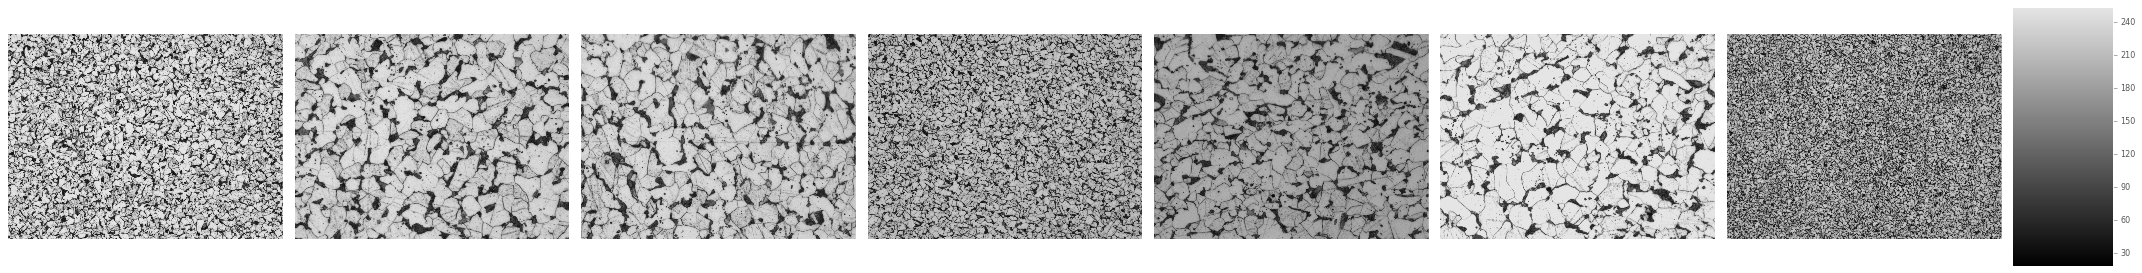

In [3]:
import skimage.io as io
import matplotlib.pylab as plt
import numpy as np
from pymks.tools import draw_microstructures

draw_microstructures(X)

# for x in X:
#     plt.figure()
#     plt.imshow(x ,cmap=plt.cm.gray) 
# plt.show

These images are in grayscale. We need to make them black and white, since we know that there are only two different particles in the microstructure. We do this by thresholding the image, which will make each pixel in the image either black or white.

In [4]:
from skimage.filters import threshold_otsu

# OLD
# X_thresh = threshold_otsu(X)
# X_binary = X > X_thresh
# X_binary = X_binary[:,200:800,200:800]

samples = len(X)
X_binary = np.ndarray(shape=(samples,X.shape[1],X.shape[2]))
X_binary.shape
i=0
for x in X:
    x_thresh = threshold_otsu(x)
    X_binary[i] = x > x_thresh
    i += 1
print "X_binary shape", X_binary.shape

X_binary shape (7L, 1040L, 1388L)


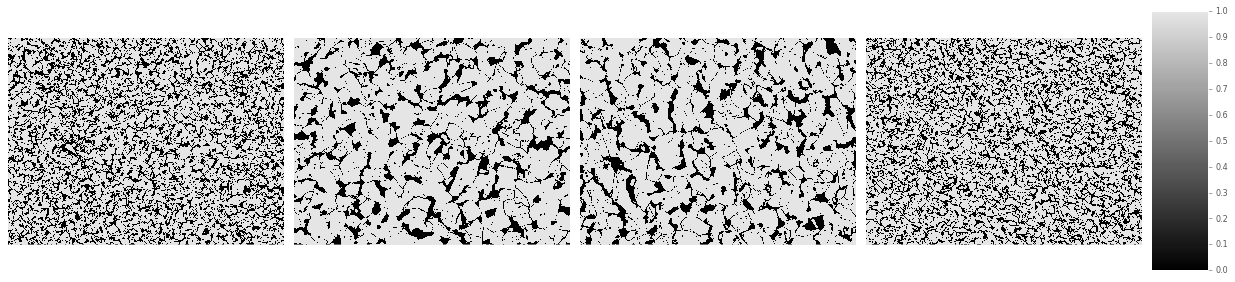

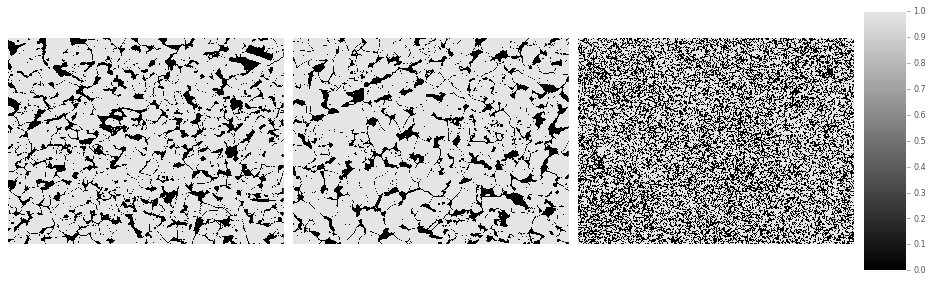

In [5]:
draw_microstructures(X_binary[0:4])
draw_microstructures(X_binary[4:])

# for x in X_binary:
#     plt.figure()
#     plt.imshow(x ,cmap=plt.cm.gray) 
# plt.show


In [6]:
from pymks.stats import correlate
from pymks import PrimitiveBasis

prim_basis = PrimitiveBasis(n_states=2)
X_ = prim_basis.discretize(X_binary)
X_corr = correlate(X_, periodic_axes=(0,1))
print "Shape of X_corr", X_corr.shape

Shape of X_corr (7L, 1040L, 1388L, 3L)


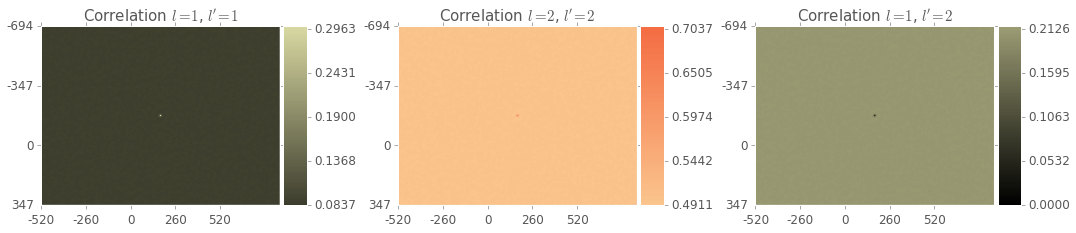

Volume fraction of black phase 0.296297235738
Volume fraction of white phase 0.703702730905


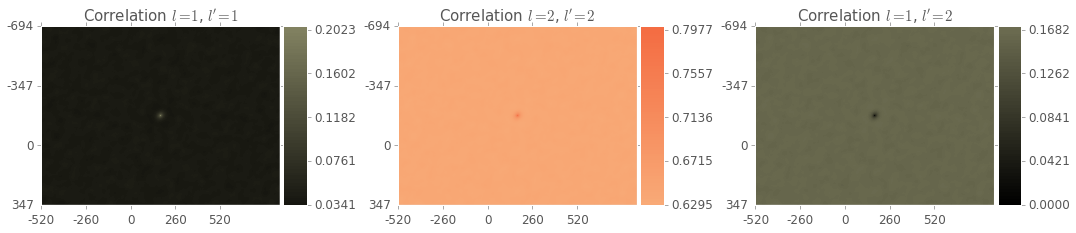

Volume fraction of black phase 0.202279836968
Volume fraction of white phase 0.797720129675


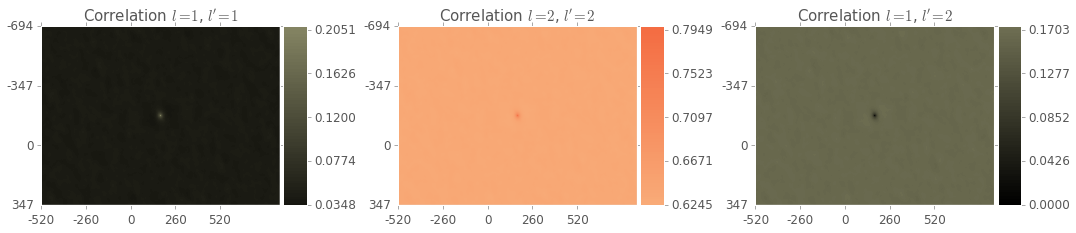

Volume fraction of black phase 0.205145055228
Volume fraction of white phase 0.794854911416


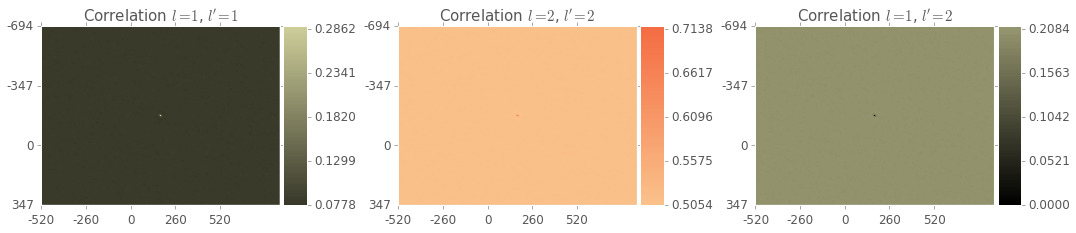

Volume fraction of black phase 0.286194154719
Volume fraction of white phase 0.713805811925


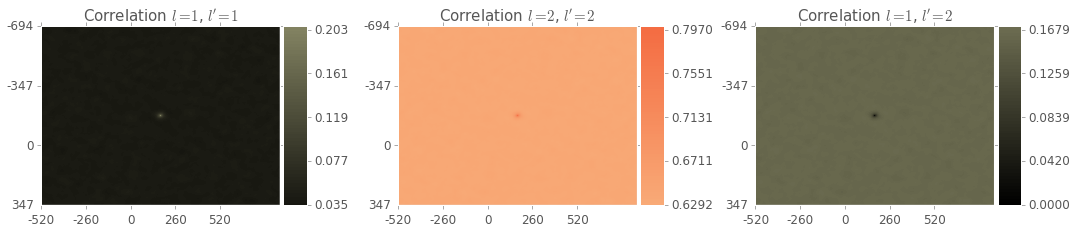

Volume fraction of black phase 0.202951805467
Volume fraction of white phase 0.797048161176


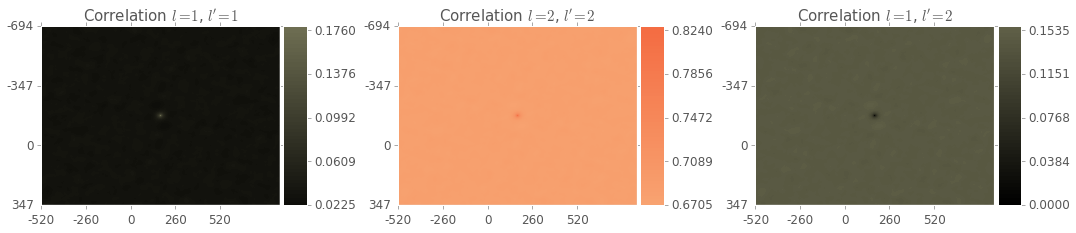

Volume fraction of black phase 0.176005868658
Volume fraction of white phase 0.823994097985


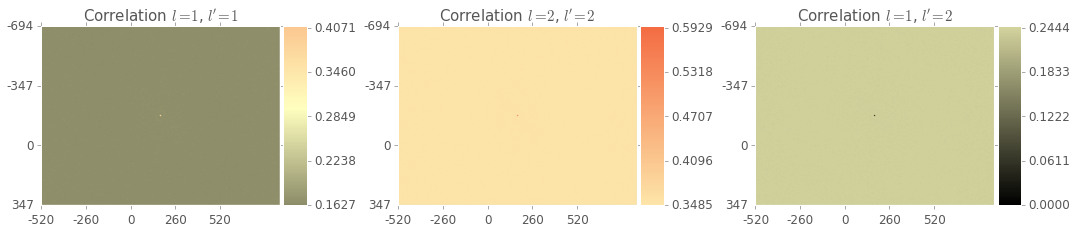

Volume fraction of black phase 0.40709167895
Volume fraction of white phase 0.592908287693


In [7]:
from pymks.tools import draw_correlations

for i in range(samples):
    draw_correlations(X_corr[i], correlations=[(1, 1), (2, 2), (1, 2)])
    x_center = (X_corr.shape[1] + 1) / 2
    y_center = (X_corr.shape[2] + 1) / 2
    print 'Volume fraction of black phase', X_corr[i, x_center, y_center, 0]
    print 'Volume fraction of white phase', X_corr[i, x_center, y_center, 1]